## Online Retail Exploratory Data Analysis with Python 

The dataset contained valuable information about customer purchases, including product details, quantities, prices, and timestamps. My main task was to explore and analyze this dataset to gain crucial insights into the store's sales trends, customer behavior, and popular products.

By conducting thorough exploratory data analysis, I was able to identify meaningful patterns, outliers, and correlations in the data.

Throughout the project, I utilized various data visualizations and statistical analysis techniques to uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. These insights proved to be invaluable in driving strategic business decisions and improving the store's overall performance in the highly competitive online retail market.

## 1. Load the Dataset
* Import necessary libraries.
* Load the dataset into a Pandas DataFrame.

In [21]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Understand the Data
* Check the shape and general information about the dataset.
* Get a summary of statistics.

In [22]:
# Shape of the dataset
print(f'Dataset Shape: {data.shape}')

print(50 * '*')

# General information
data.info()
print(50 * '*')
# Summary statistics
data.describe()


Dataset Shape: (541909, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
**************************************************


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 3. Check for Missing Values
* Identify any missing values in the dataset.

In [23]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Description      1454
CustomerID     135080
dtype: int64


## 4. Handle Missing Values
* Drop or fill missing values as appropriate.

In [24]:
# Dropping rows with missing values
data_cleaned = data.dropna()

# Alternatively, you could fill missing values if applicable
# data['Column_Name'] = data['Column_Name'].fillna(value)


## 5. Data Cleaning
* Check for and remove duplicates.
* Ensure data types are correct.

In [25]:
# Removing duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Checking and converting data types if necessary
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['CustomerID'] = data_cleaned['CustomerID'].astype(str)


## 6. Exploratory Data Analysis
* **Univariate Analysis**: Analyze individual features (e.g., frequency distribution).
* **Bivariate Analysis**: Explore relationships between variables (e.g., scatter plots, correlation).
* **Multivariate Analysis**: Examine the interactions between multiple variables (e.g., pair plots)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

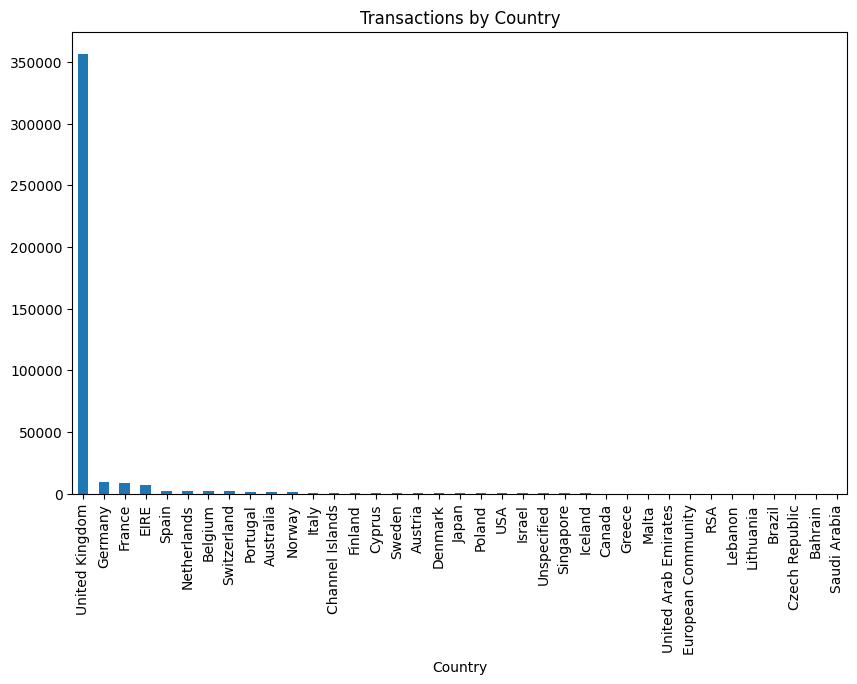

In [27]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
data_cleaned['Country'].value_counts().plot(kind='bar')
plt.title('Transactions by Country')
plt.show()

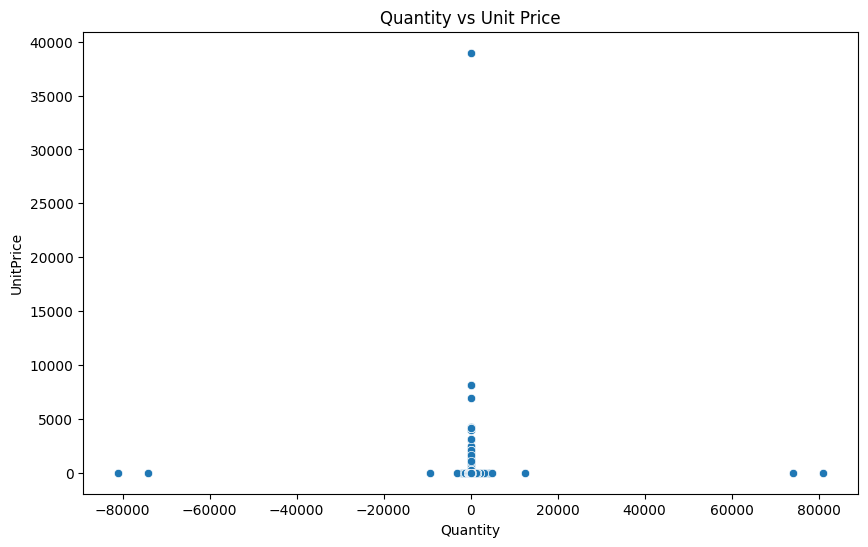

In [28]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data_cleaned)
plt.title('Quantity vs Unit Price')
plt.show()

## 7. Feature Engineering
* Create new features if needed, like `TotalPrice (Quantity × UnitPrice)`.

In [29]:
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Segmenting the Data
* Segment the data based on different dimensions (e.g., customer segments, country-based analysis).

In [30]:
# Country-wise sales
country_sales = data_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(country_sales)


Country
United Kingdom          6747156.154
Netherlands              284661.540
EIRE                     250001.780
Germany                  221509.470
France                   196626.050
Australia                137009.770
Switzerland               55739.400
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  28995.760
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6988.400
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2660.770
Malta                      2505.470
United Arab Emirates

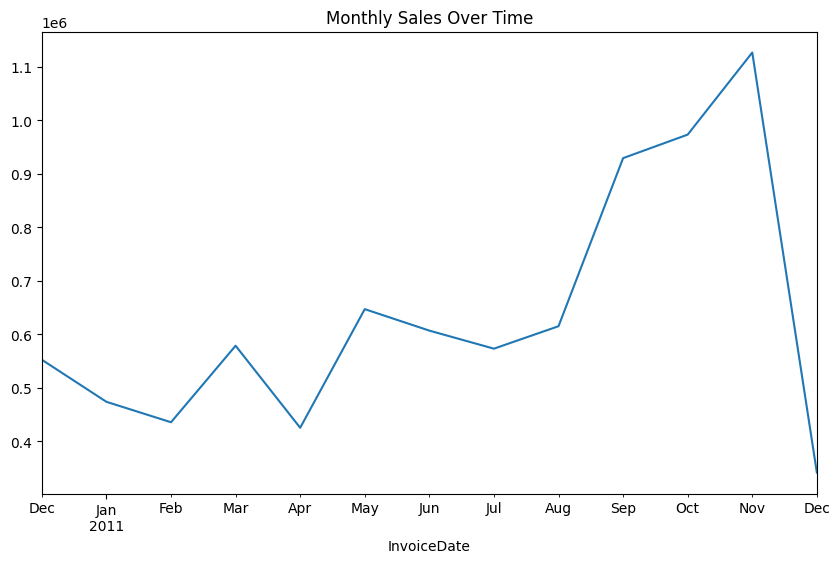

In [31]:
# Time-series analysis on sales
data_cleaned.set_index('InvoiceDate', inplace=True)
monthly_sales = data_cleaned['TotalPrice'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.show()

In [40]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 401604 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   UnitPrice    401604 non-null  float64
 5   CustomerID   401604 non-null  object 
 6   Country      401604 non-null  object 
 7   TotalPrice   401604 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [41]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [42]:
data_cleaned = data_cleaned.index.to_frame(name='InvoiceDate').join(data_cleaned)

In [44]:
data_cleaned.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [36]:
data_cleaned['Description']

InvoiceDate
2010-12-01 08:26:00     WHITE HANGING HEART T-LIGHT HOLDER
2010-12-01 08:26:00                    WHITE METAL LANTERN
2010-12-01 08:26:00         CREAM CUPID HEARTS COAT HANGER
2010-12-01 08:26:00    KNITTED UNION FLAG HOT WATER BOTTLE
2010-12-01 08:26:00         RED WOOLLY HOTTIE WHITE HEART.
                                      ...                 
2011-12-09 12:50:00            PACK OF 20 SPACEBOY NAPKINS
2011-12-09 12:50:00           CHILDREN'S APRON DOLLY GIRL 
2011-12-09 12:50:00          CHILDRENS CUTLERY DOLLY GIRL 
2011-12-09 12:50:00        CHILDRENS CUTLERY CIRCUS PARADE
2011-12-09 12:50:00          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object

In [45]:
data_cleaned['InvoiceDate']

InvoiceDate
2010-12-01 08:26:00   2010-12-01 08:26:00
2010-12-01 08:26:00   2010-12-01 08:26:00
2010-12-01 08:26:00   2010-12-01 08:26:00
2010-12-01 08:26:00   2010-12-01 08:26:00
2010-12-01 08:26:00   2010-12-01 08:26:00
                              ...        
2011-12-09 12:50:00   2011-12-09 12:50:00
2011-12-09 12:50:00   2011-12-09 12:50:00
2011-12-09 12:50:00   2011-12-09 12:50:00
2011-12-09 12:50:00   2011-12-09 12:50:00
2011-12-09 12:50:00   2011-12-09 12:50:00
Name: InvoiceDate, Length: 20584748, dtype: datetime64[ns]

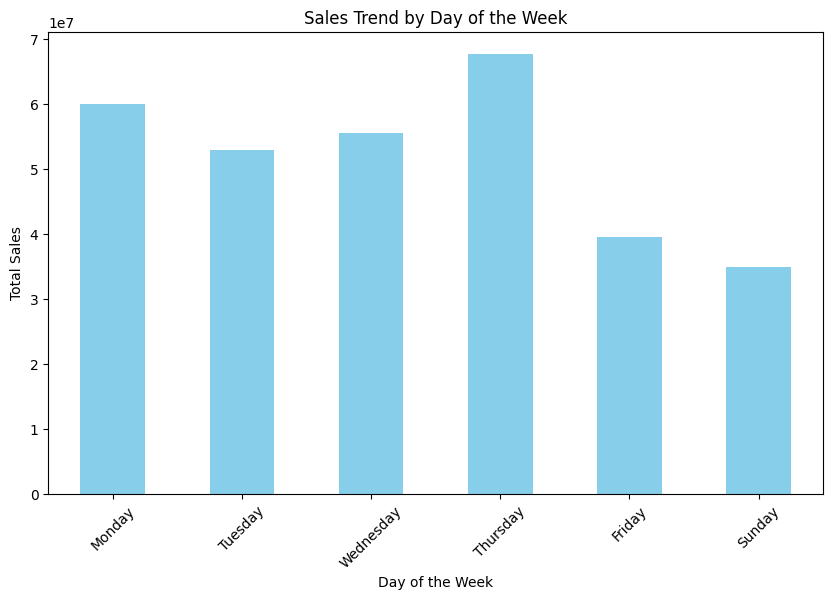

In [46]:
# Extract day of the week from InvoiceDate (0 = Monday, 6 = Sunday)
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek

# Calculate total sales by day of the week
sales_by_day = data_cleaned.groupby('DayOfWeek')['TotalPrice'].sum()

# Map day numbers to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sales_by_day.index = sales_by_day.index.map(day_map)

# Plotting the sales trend by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Sales Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
